In [64]:
!pip install pandas
!pip install matplotlib

In [65]:
%matplotlib inline
import pandas as pd

In [66]:
# df = pd.read_csv("bio/DNA.txt", index_col=False, header=0)
seq = ""
with open("data/DNA.txt") as file:
    for line in file:
        if line[0] is '>':
            print(line)
        else:
            seq = line.upper()

>dm3gene_dna range=contig1:1-11000 5'pad=0 3'pad=0 strand=+ repeatMasking=none



In [67]:
# create a row from each entry in dictionary
d = {
    'A': [],
    'C': [],
    'G': [],
    'T': [],
    'N': [],
}

for s in seq:
    d[s].append(1)
    for k in d.keys():
        if k is not s:
            d[k].append(0)

In [68]:
df = pd.DataFrame(d)
df.head()
df.size

55305

In [73]:
total_gc = df.C.mean() + df.G.mean()
print("GC content of this sequence is: ", total_gc)
print("Total unknown of this sequence is: ", df.N.mean())
# I verified this here https://www.sciencebuddies.org/science-fair-projects/references/genomics-g-c-content-calculator

GC content of this sequence is:  0.47825693879396075
Total unknown of this sequence is:  0.005514872073049453


In [70]:
s = int(df.shape[0])
window_size = int(s / 20)

def get_averages(offset=0, print_me=False):
    rolling_avg = []
    window = []
    for i in range(offset, s, window_size):
        gc = df.iloc[i : i + window_size].G.mean() + df.iloc[i : i + window_size].C.mean()
        if print_me:
            print("window: ", i, i + window_size, "\t the gc content is: ", gc, "unknown: ", df.iloc[i : i + window_size].N.mean())
        rolling_avg.append(gc)
        window.append((i, i+window_size))
    return rolling_avg, window

In [71]:
# rolling_avg0, window0 = get_averages()
# rolling_avg1, window1 = get_averages(offset=int(s/66.6)) # approximately 1.5%

window:  0 553 	 the gc content is:  0.4647377938517179 unknown:  0.0
window:  553 1106 	 the gc content is:  0.4701627486437613 unknown:  0.03616636528028933
window:  1106 1659 	 the gc content is:  0.4412296564195298 unknown:  0.0
window:  1659 2212 	 the gc content is:  0.5027124773960217 unknown:  0.0379746835443038
window:  2212 2765 	 the gc content is:  0.488245931283906 unknown:  0.0
window:  2765 3318 	 the gc content is:  0.3707052441229657 unknown:  0.0
window:  3318 3871 	 the gc content is:  0.488245931283906 unknown:  0.0
window:  3871 4424 	 the gc content is:  0.4755877034358047 unknown:  0.03616636528028933
window:  4424 4977 	 the gc content is:  0.5027124773960217 unknown:  0.0
window:  4977 5530 	 the gc content is:  0.325497287522604 unknown:  0.0
window:  5530 6083 	 the gc content is:  0.39059674502712477 unknown:  0.0
window:  6083 6636 	 the gc content is:  0.5786618444846293 unknown:  0.0
window:  6636 7189 	 the gc content is:  0.5063291139240507 unknown:  0.

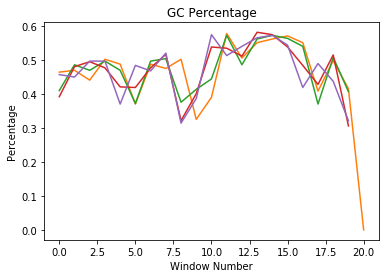

In [72]:
import matplotlib.pyplot as plt
plt.plot(total_gc)
off = int(s/float(66.6))

if off == 0:
    plt.plot(get_averages(offset=0)[0])
else:
    for o in range(0, window_size, off):
        plt.plot(get_averages(offset=o, print_me=True)[0])

plt.ylabel('Percentage')
plt.xlabel('Window Number')
plt.title('GC Percentage')
plt.show()